## 2장

k-최근접 이웃  
=> from sklearn.neighbors import KNeighborsClassifier  

In [ ]:
bream_length = [ 25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [ 242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0]

smelt_length = [ 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
       12.4, 13.0, 14.3, 15.0]
smelt_weight = [ 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
       12.2, 19.7, 19.9]


length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)] #도미를 찾는 대상으로 정했기 때문에 도미를 1로 두기

fish_target = [1] * 35 + [0] * 14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

kn.score(fish_data, fish_target)

kn.predict([[30, 600]])  # 1이면 도미, 0이면 빙어

array([1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# print(input_arr.shape)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
"""
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""
kn.fit(train_input, train_target)
kn.predict(test_input)


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

[1.]


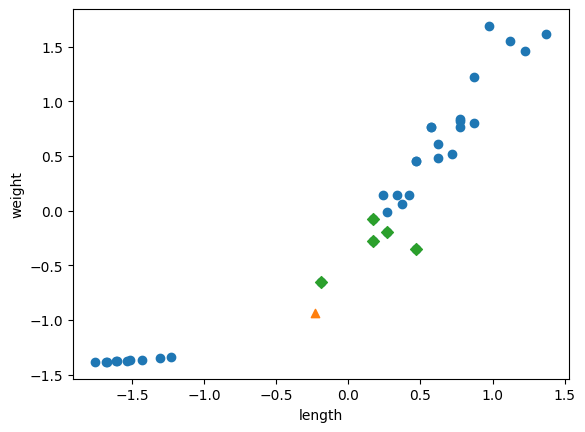

In [ ]:
from sklearn.model_selection import train_test_split
fish_data = np.column_stack((length, weight))

# print(fish_data[:5])

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# print(fish_target)

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)
""" stratify=fish_target을 사용하면 클래스 비율에 맞게 데이터를 나눔"""
# print(train_input.shape, test_input.shape)
# print(test_target)
# print(kn.predict([[25,150]]))

mean = np.mean(train_input, axis=0)  # 평균
std = np.std(train_input, axis=0)    # 표준편차

train_scaled = (train_input - mean) / std  # 표준점수

new = ([25, 150] - mean) / std  # test 또한 표준점수로

kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 3장

k-최근접 이웃 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

perch_length = np.array(
    [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [  5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
    )

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
test_array = np.array([1,2,3,4])
# print(test_array.shape)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
# print(train_input.shape, test_input.shape)

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)  # k-최근접 이웃 회귀 모델 훈련
 # print(knr.score(test_input, test_target))



test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction) # 절댓값 오차
print(mae)
"""## 과대적합 vs 과소적합"""
print(knr.score(train_input, train_target)) # R^2(결정계수) = 1 - ((타깃 - 예측)^2)의 합/ ((타깃 - 평균)^2)의 합
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

19.157142857142862
0.9698823289099254
0.9804899950518966
0.9746459963987609


K-최근접 이웃의 한계..?

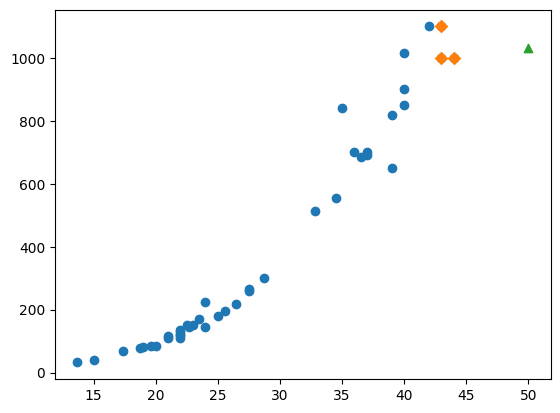

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

perch_length = np.array(
 [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
 )
perch_weight = np.array(
 [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
 1000.0, 1000.0]
 )

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
# print(knr.predict([[50]]))   ->  1033.3333
# print(knr.predict([[100]]))  ->  1033.3333  => 길이가 달라져도 무게가 같은 오류발생

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50,1033,marker='^')
plt.show()

선형 회귀

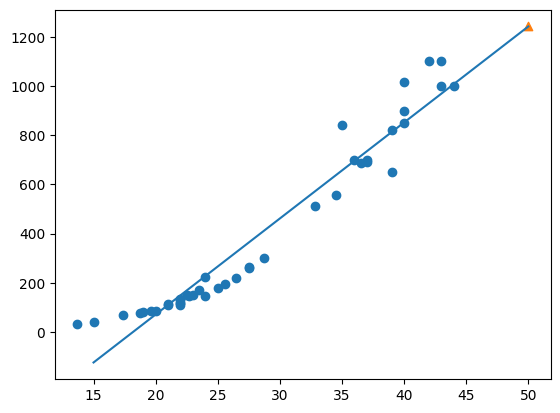

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

perch_length = np.array(
 [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
 )
perch_weight = np.array(
 [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
 1000.0, 1000.0]
 )

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

#lr.coef_는 기울기,  lr.intercept_는 y절편
lr = LinearRegression()
lr.fit(train_input, train_target)

# print(lr.predict([[50]]))    ->  1241.8386
# print(lr.predict([[100]]))   ->  3192.6959  => 길이에 따라 무게가 달라지는 결과값

plt.scatter(train_input, train_target)

# [15,50]은 [x1,x2]값, y=(coef_)*x + intercept_이므로 아래처럼 나옴
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8,marker='^')
plt.show()

다항 회귀

[  1.01433211 -21.55792498] 116.0502107827827


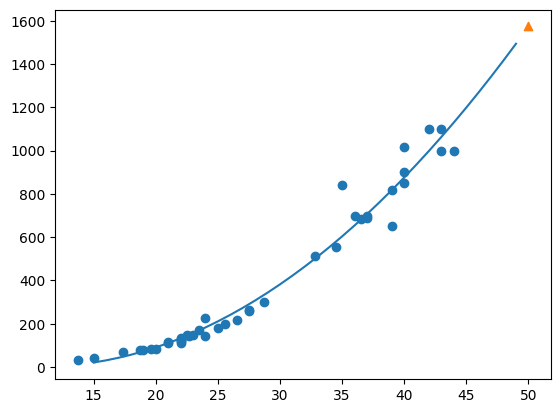

0.9706807451768623
0.9775935108325122


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

perch_length = np.array(
 [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
 )
perch_weight = np.array(
 [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
 1000.0, 1000.0]
 )

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 다항 회귀 이므로 x^2, x 를 만들어줌
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_) # 1.014*(길이)^2 - 21.558*(길이) + 116.05 라는 그래프를 학습

point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.014*point**2 - 21.558*point +116.05) # 2차 방정식
plt.scatter(50,1574,marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))  # 훈련보다 테스트 성능이 조금 높은것으로보아 과소적합된 경향이 있음

다중 회귀 - 여러 개의 특성을 사용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures # 입력 데이터의 다항식 조합을 자동으로 만들어줌
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

df= pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_weight = np.array(
 [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
 1000.0, 1000.0]
 )

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

poly = PolynomialFeatures(include_bias=False)  # 기본값은 2차항
"""
poly.fit([[2,3]]) # 특성 2개짜리 데이터 하나 => x1=2, x2=3
print(poly.transform([[2,3]]))
# 만들 수 있는 경우의 수 x1, x2, x1x1, x1x2, x2x2 => 2,3,4,6,9
"""

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))   # 과소 적합 문제 해결

"""
차수를 5제곱까지 특성을 만
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))  # 거의 완벽
print(lr.score(test_poly, test_target))    # 과대 적합
"""

0.9903183436982125
0.9714559911594111
0.9999999999996433
-144.40579436844948
